In [279]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [280]:
# Readig Data
data = pd.read_csv("C:\\Benion\\Benion Programmings\\Python\\AI & ML\\data\\tree-diameter-height.csv")
data.shape

(450, 3)

In [281]:
# Visualize Data
data.head(10)

,S/N,Height,Diameter
0,1,16.199683,43.514815
1,2,20.832644,9.981329
2,3,0.488141,10.561674
3,4,22.710793,3.966893
4,5,7.883484,39.131736
5,6,10.585037,8.313417
6,7,3.997367,6.735644
7,8,20.572101,45.635678
8,9,4.568331,6.560634
9,10,22.774925,9.151818


In [282]:
# Declaring Dependent and Independent Variables
height = data["Height"].values.reshape(-1, 1)
diameter = data["Diameter"].values.reshape(-1, 1)

In [283]:
# Scaling Data
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(height)
y = sc_y.fit_transform(diameter)

In [284]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #random_state=0

In [285]:
# Implement the Support Vector Machine --> Support Vector Regressor and fit the data
model = SVR(kernel="rbf")
model.fit(X_train, y_train)

C:\Users\benion\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [286]:
# Make Prediction
y_predictions = model.predict(X_test)
y_predictions = sc_y.inverse_transform(y_predictions)

In [287]:
# Table showing the Actual values and the Predicted values
data_frame = pd.DataFrame({"Actual(x)": sc_X.inverse_transform(X_test.flatten()), "Actual(y)": sc_y.inverse_transform(y_test.flatten()), "Predicted(y)": y_predictions.flatten()})
data_frame

,Actual(x),Actual(y),Predicted(y)
0,19.076288,12.069583,25.769113
1,19.544503,21.221690,25.677366
2,22.865461,45.497228,25.370720
3,10.643375,20.830924,22.859798
4,4.254015,28.024262,20.906502
...,...,...,...
85,16.286070,42.112683,25.534785
86,1.144152,10.553709,19.254397
87,9.580989,19.268055,23.060135
88,14.009975,29.108631,24.085563


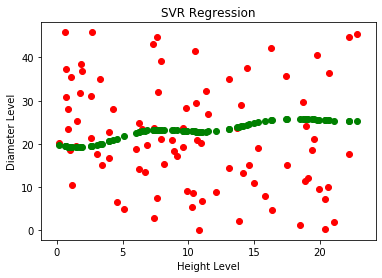

In [288]:
# Scatter plot of X against y
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test), color="red")
plt.scatter(sc_X.inverse_transform(X_test), y_predictions, color="green")
plt.title("SVR Regression")
plt.xlabel("Height Level")
plt.ylabel("Diameter Level")
plt.show()

In [289]:
# Errors and Score
mean_absolute_error = mean_absolute_error(sc_y.inverse_transform(y_test), y_predictions)
mean_squared_error = mean_squared_error(sc_y.inverse_transform(y_test), y_predictions)
root_mean_squared_error = np.sqrt(mean_squared_error)
r2_score = model.score(X_train, y_train)
print(f"Mean Absolute Error: {mean_absolute_error}")
print(f"Mean Squared Error: {mean_squared_error}")
print(f"Root Mean Squared Error: {root_mean_squared_error}")
print(f"r^2 Score: {r2_score} -- ({r2_score * 100})%")

Mean Absolute Error: 10.88350752678797
Mean Squared Error: 170.30403027570856
Root Mean Squared Error: 13.050058631121493
r^2 Score: 0.01232411240831377 -- (1.232411240831377)%
